# Housing Prices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVC

df = pd.read_csv('./data/housing_prices.csv')
print(df.shape[0], 'rows')
print(df.shape[1], 'columns')
df.head()

52964 rows
12 columns


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,Western Metropolitan,3464,10.4,Moonee Valley City Council


## Data Dictionary
- Suburb
- Address
- Rooms: # of rooms
- Price: in AUD
- Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.
- Type: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.
- SellerG: real estate agent name
- Date: date sold
- Distance: distance from CBD in km
- Regionname: general region (West, North West, North, North east, etc)
- Propertycount: # of properties in suburb
- Bedroom2 : scraped # of Bedrooms (from alternate source)
- Bathroom: # of bathrooms
- Car: # of carspots
- Landsize: land size in meters
- BuildingArea: building size in meters
- YearBuilt
- CouncilArea: governing council for the area
- Lattitude
- Longtitude

In [2]:
for col in df.columns:
    print(col, '-', df[col].dtype, ';', len(df[col].unique()), 'unique vals')

Suburb - object ; 375 unique vals
Address - object ; 48396 unique vals
Rooms - int64 ; 13 unique vals
Type - object ; 3 unique vals
Price - float64 ; 3254 unique vals
Method - object ; 9 unique vals
SellerG - object ; 434 unique vals
Date - object ; 91 unique vals
Regionname - object ; 8 unique vals
Propertycount - int64 ; 364 unique vals
Distance - float64 ; 180 unique vals
CouncilArea - object ; 33 unique vals


In [3]:
# Remove rows without Price
df = df.dropna(subset=['Price'])

# Convert date to actual datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].apply(lambda x: x.year)
df['Month'] = df['Date'].apply(lambda x: x.month)

# Get dummies for categorical columns
df = pd.get_dummies(df, columns=['Type', 'Method', 'Regionname', 'CouncilArea'])
df.head()

,Suburb,Address,Rooms,Price,SellerG,Date,Propertycount,Distance,Year,Month,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
0,Abbotsford,49 Lithgow St,3,1490000.0,Jellis,2017-01-04,4019,3.0,2017,1,...,0,0,0,0,0,0,0,0,1,0
1,Abbotsford,59A Turner St,3,1220000.0,Marshall,2017-01-04,4019,3.0,2017,1,...,0,0,0,0,0,0,0,0,1,0
2,Abbotsford,119B Yarra St,3,1420000.0,Nelson,2017-01-04,4019,3.0,2017,1,...,0,0,0,0,0,0,0,0,1,0
3,Aberfeldie,68 Vida St,3,1515000.0,Barry,2017-01-04,1543,7.5,2017,1,...,0,0,0,0,0,0,0,0,0,0
4,Airport West,92 Clydesdale Rd,2,670000.0,Nelson,2017-01-04,3464,10.4,2017,1,...,0,0,0,0,0,0,0,0,0,0


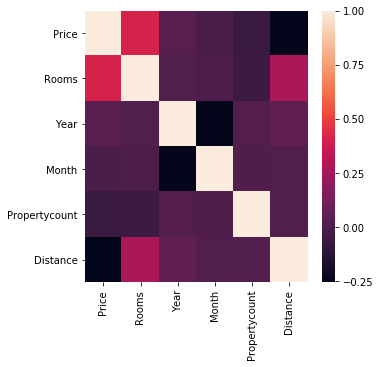

In [4]:
continuous_cols = ['Price', 'Rooms', 'Date', 'Year', 'Month', 'Propertycount', 'Distance']

plt.figure(figsize=(5,5))
sns.heatmap(df[continuous_cols].corr())
plt.show()

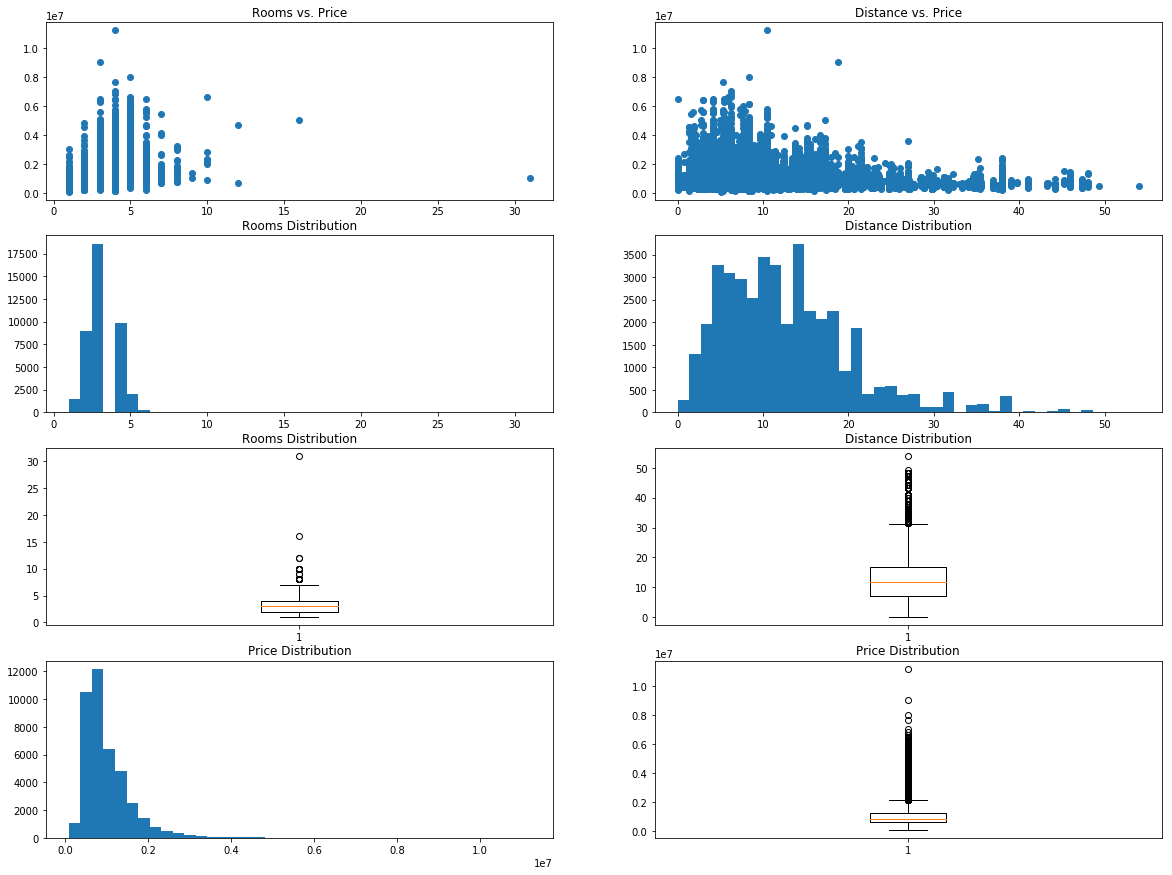

In [5]:
def show_plots(df):
    plt.figure(figsize=(20,15))

    plt.subplot(4, 2, 1)
    plt.scatter(df['Rooms'], df['Price'])
    plt.title('Rooms vs. Price')

    plt.subplot(4, 2, 2)
    plt.scatter(df['Distance'], df['Price'])
    plt.title('Distance vs. Price')

    plt.subplot(4, 2, 3)
    plt.hist(df['Rooms'], bins=40)
    plt.title('Rooms Distribution')

    plt.subplot(4, 2, 4)
    plt.hist(df['Distance'], bins=40)
    plt.title('Distance Distribution')

    plt.subplot(4, 2, 5)
    plt.boxplot(df['Rooms'])
    plt.title('Rooms Distribution')

    plt.subplot(4, 2, 6)
    plt.boxplot(df['Distance'])
    plt.title('Distance Distribution')

    plt.subplot(4, 2, 7)
    plt.hist(df['Price'], bins=40)
    plt.title('Price Distribution')

    plt.subplot(4, 2, 8)
    plt.boxplot(df['Price'])
    plt.title('Price Distribution')

    plt.show()
    
show_plots(df)

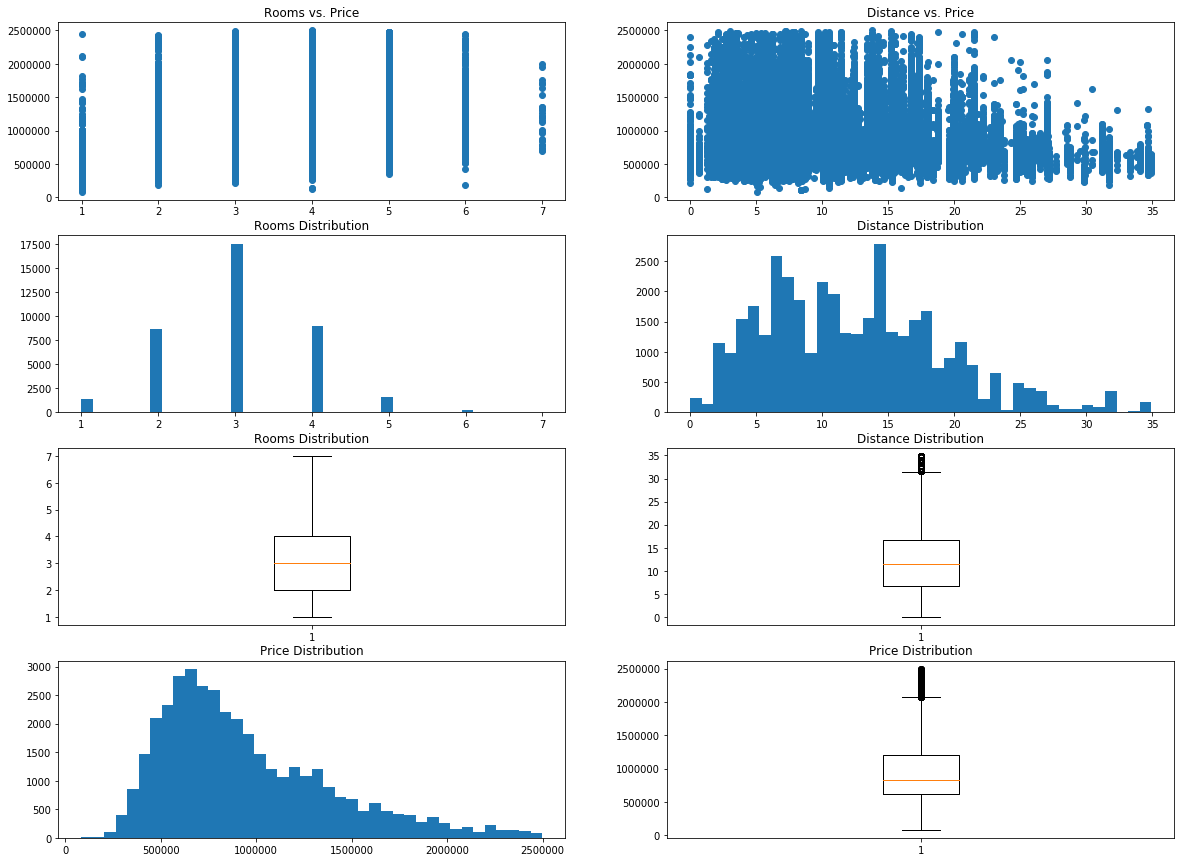

In [6]:
# Get rid of outliers
df = df[df['Rooms'] < 8]
df = df[df['Distance'] < 35]
df = df[df['Propertycount'] < 18000]
df = df[df['Price'] < 2500000]
show_plots(df)

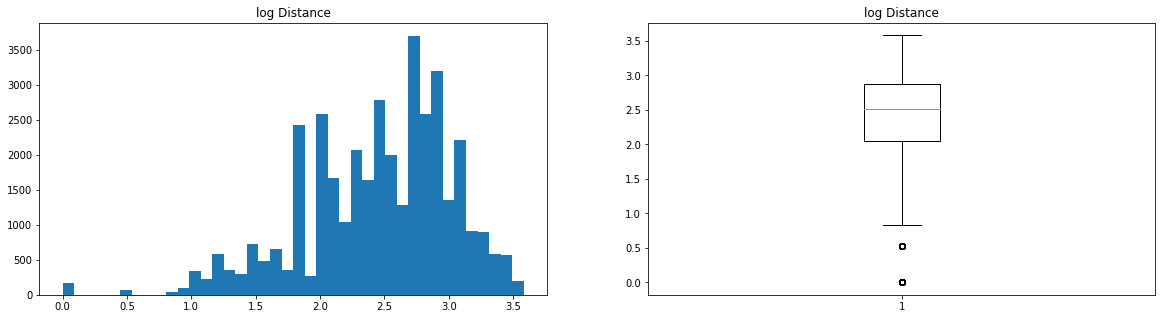

In [7]:
# Feature engineering
# TODO: More engineering? Normalize or scale data?
df['log Distance'] = np.log(df['Distance'] + 1)

plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.hist(df['log Distance'], bins=40)
plt.title('log Distance')

plt.subplot(1, 2, 2)
plt.boxplot(df['log Distance'])
plt.title('log Distance')

plt.show()

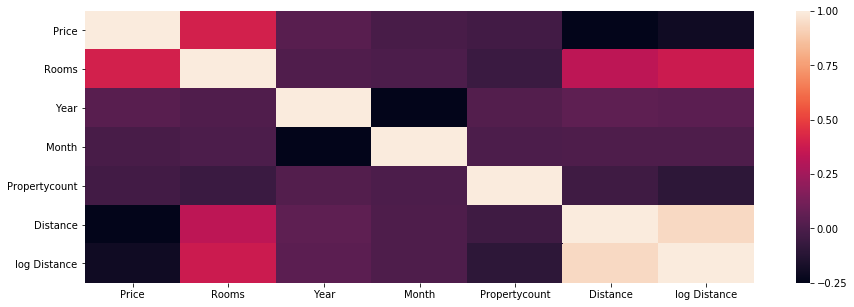

In [8]:
continuous_cols = continuous_cols + ['log Distance']

plt.figure(figsize=(15,5))
sns.heatmap(df[continuous_cols].corr())
plt.show()

In [9]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Price', 'SellerG', 'Date',
       'Propertycount', 'Distance', 'Year', 'Month', 'Type_h', 'Type_t',
       'Type_u', 'Method_PI', 'Method_S', 'Method_SA', 'Method_SP',
       'Method_VB', 'Regionname_Eastern Metropolitan',
       'Regionname_Eastern Victoria', 'Regionname_Northern Metropolitan',
       'Regionname_Northern Victoria', 'Regionname_South-Eastern Metropolitan',
       'Regionname_Southern Metropolitan', 'Regionname_Western Metropolitan',
       'Regionname_Western Victoria', 'CouncilArea_Banyule City Council',
       'CouncilArea_Bayside City Council',
       'CouncilArea_Boroondara City Council',
       'CouncilArea_Brimbank City Council',
       'CouncilArea_Cardinia Shire Council', 'CouncilArea_Casey City Council',
       'CouncilArea_Darebin City Council',
       'CouncilArea_Frankston City Council',
       'CouncilArea_Glen Eira City Council',
       'CouncilArea_Greater Dandenong City Council',
       'CouncilArea_Hobsons Bay Cit

In [10]:
non_numeric_cols = ['Suburb', 'Address', 'SellerG', 'Date']

Y = df['Price']
X = np.array(df.drop(labels=['Price'] + non_numeric_cols, axis=1))
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

def fit_and_score(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    if hasattr(model, 'coef_') and hasattr(model, 'intercept_'):
        print('Coef:', model.coef_)
        print('Intercept:', model.intercept_, '\n')
    
    print('Training:', model.score(X_train, y_train))
    print('Test:', model.score(X_test, y_test))

In [11]:
fit_and_score(linear_model.LinearRegression(), X_train, y_train, X_test, y_test)

Coef: [ 1.87225803e+05 -4.06977978e-01 -1.29684591e+04  6.64540178e+04
  3.76806649e+03  2.12837514e+05  4.68782739e+03 -2.17525342e+05
 -7.58683955e+03  3.84762749e+04 -2.60240738e+04  1.23268261e+04
 -1.71921876e+04  1.22259593e+05 -1.67437146e+04 -9.61479202e+04
 -3.40544226e+03 -4.00072882e+04  2.14455107e+04 -4.76217751e+04
  6.02210363e+04 -1.23212599e+05  4.24939634e+05  3.95122302e+05
 -2.92775389e+05 -1.74622983e-10 -5.57145524e+04  6.37066922e+04
 -1.65302126e+04  2.33912093e+05 -6.26518423e+03 -2.39675964e+04
 -2.51906419e+05  2.39735132e+05 -1.55998792e+05 -1.16415322e-10
  5.40256868e+04 -1.55165173e+05 -8.40857402e+04  7.34664700e+04
 -3.22712651e+05  0.00000000e+00  1.56172166e+05  5.39778501e+04
  4.36557457e-11 -2.69017468e+04 -1.96202677e+05  1.55827105e+05
  3.15379868e+05  4.15412178e+04 -1.91306427e+05 -3.71330264e+05
  1.17548032e+05 -5.12788260e+04 -1.56704918e+05]
Intercept: -133278500.8603642 

Training: 0.6539517058886272
Test: 0.65290237985614


In [12]:
fit_and_score(linear_model.Ridge(), X_train, y_train, X_test, y_test)

Coef: [ 1.87215767e+05 -3.95593129e-01 -1.29173612e+04  6.64184437e+04
  3.76683894e+03  2.12753085e+05  4.71838402e+03 -2.17471469e+05
 -7.56501938e+03  3.84331062e+04 -2.60258598e+04  1.23114387e+04
 -1.71536657e+04  1.25824154e+05 -1.98621873e+04 -9.37367947e+04
 -8.96656178e+03 -3.45773192e+04  2.75277717e+04 -5.04903167e+04
  5.42812540e+04 -1.24023750e+05  4.20711249e+05  3.90781982e+05
 -2.87454688e+05  0.00000000e+00 -5.84703662e+04  6.30957236e+04
 -1.93113843e+04  2.29744920e+05 -9.39219460e+03 -1.90606780e+04
 -2.50832690e+05  2.36332075e+05 -1.57079913e+05  0.00000000e+00
  5.26659243e+04 -1.50319402e+05 -8.51738295e+04  7.04024235e+04
 -3.15097681e+05  0.00000000e+00  1.53435368e+05  5.87345135e+04
  0.00000000e+00 -2.72910244e+04 -1.88090212e+05  1.51039478e+05
  3.10430872e+05  4.01840246e+04 -1.91225427e+05 -3.65577297e+05
  1.16163396e+05 -4.53214118e+04 -1.57782357e+05]
Intercept: -133206755.49521169 

Training: 0.6539481908530269
Test: 0.6529356425056991


In [13]:
fit_and_score(linear_model.Lasso(alpha=100), X_train, y_train, X_test, y_test)

Coef: [ 1.87181649e+05 -2.54234641e-01 -1.35555762e+04  6.58124322e+04
  3.72403229e+03  2.06940192e+05  0.00000000e+00 -2.21506509e+05
  0.00000000e+00  4.52724412e+04 -5.36232396e+03  1.82343390e+04
 -8.43935604e+03  1.55975928e+05 -0.00000000e+00 -6.44961291e+04
 -0.00000000e+00  0.00000000e+00  7.12169778e+04 -4.10544626e+04
  2.65048348e+04 -1.19686156e+05  4.09495018e+05  3.73437442e+05
 -2.61707753e+05  0.00000000e+00 -2.66332021e+04  5.83787393e+04
 -0.00000000e+00  2.15170460e+05 -0.00000000e+00  0.00000000e+00
 -2.36127860e+05  2.39435772e+05 -1.42260991e+05  0.00000000e+00
  5.39773989e+04 -1.31278896e+05 -7.08634039e+04  5.20067091e+04
 -2.63574561e+05  0.00000000e+00  1.50249125e+05  7.49309092e+04
  0.00000000e+00 -2.70293416e+04 -1.39318287e+05  1.27071303e+05
  2.87911077e+05  4.12879736e+04 -1.79651046e+05 -3.34820008e+05
  1.04207157e+05 -0.00000000e+00 -1.61501634e+05]
Intercept: -132001654.09777988 

Training: 0.6537197393160912
Test: 0.6530592942688289


In [14]:
# fit_and_score(SVC(C=10, kernel='linear'), X_train, y_train, X_test, y_test)

In [15]:
# 1000 iterations, 2-deep trees
params = {'n_estimators': 1000, 'max_depth': 2, 'learning_rate': 1, 'loss': 'huber'}

fit_and_score(ensemble.GradientBoostingRegressor(**params), X_train, y_train, X_test, y_test)

Training: 0.7872776388424656
Test: 0.765373958417002


In [16]:
# add hyperparameters to avoid overfitting (big diff between train and test)
fit_and_score(ensemble.RandomForestRegressor(n_estimators=1000), X_train, y_train, X_test, y_test)

Training: 0.9354548823298944
Test: 0.7288888558657167


## Conclusion

My Gradient Boosting Regressor model performed the best for this particular problem, with a test R-squared value of ~76.5%.